In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
benchmark_file = "./profile_tritonserver_bge_large_zh_ensemble.csv"
assert os.path.exists(benchmark_file)

In [4]:
# Load the CSV file into a DataFrame
df = pd.read_csv(benchmark_file)
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print("Header:", df.columns)

qps = "QPS"
throughput = "throughput(k_token/s)"

Number of rows: 144
Number of columns: 11
Header: Index(['text_length', 'batch_size', 'worker_num', 'request_num', 'total_time',
       'QPS', 'throughput(k_token/s)', 'latency.avg(ms)', 'latency.p90(ms)',
       'latency.p95(ms)', 'latency.p99(ms)'],
      dtype='object')


In [5]:
# the 32th row
df.iloc[31]

# the rows from the 11th to the 20th
df.iloc[10:20]

# display the first 10 rows
df.head(n=10)


,text_length,batch_size,worker_num,request_num,total_time,QPS,throughput(k_token/s),latency.avg(ms),latency.p90(ms),latency.p95(ms),latency.p99(ms)
0,128,1,1,200,1,184,23,5,6,6,6
1,128,1,3,600,2,337,43,9,9,9,11
2,128,1,5,1000,2,437,55,10,13,14,14
3,128,1,7,1400,3,441,56,15,18,18,19
4,256,1,1,200,1,187,47,5,5,6,6
5,256,1,3,600,2,307,78,10,10,10,11
6,256,1,5,1000,3,391,100,12,15,15,15
7,256,1,7,1400,4,389,99,16,20,20,21
8,384,1,1,200,1,171,65,6,6,6,7
9,384,1,3,600,2,273,104,11,11,11,12


In [6]:
# Get unique values
unique_text_length = df['text_length'].unique()
print("Unique values using unique():", unique_text_length)

# Get the number of unique values
unique_count = df['text_length'].nunique()
print("Number of unique values using nunique():", unique_count)

Unique values using unique(): [128 256 384 512]
Number of unique values using nunique(): 4


In [8]:
#df["text_length"]
#df["QPS"].max()
print("*" * 10, "Max QPS:", "*" * 10)
# Find the row with the maximum QPS
max_qps_row = df.loc[df[qps].idxmax()]
# Print the row with the maximum QPS
print(max_qps_row)

print("*" * 10, "Max throughput:", "*" * 10)
max_throughtpus_row = df.loc[df[throughput].idxmax()]
print(max_throughtpus_row)


********** Max QPS: **********
text_length               128
batch_size                  1
worker_num                  7
request_num              1400
total_time                  3
QPS                       441
throughput(k_token/s)      56
latency.avg(ms)            15
latency.p90(ms)            18
latency.p95(ms)            18
latency.p99(ms)            19
Name: 3, dtype: int64
********** Max throughput: **********
text_length               512
batch_size                  5
worker_num                  5
request_num              1000
total_time                 13
QPS                        76
throughput(k_token/s)     195
latency.avg(ms)            54
latency.p90(ms)            79
latency.p95(ms)            79
latency.p99(ms)            79
Name: 46, dtype: int64


In [9]:
# Sort the DataFrame by the 'QPS' column in ascending order
df_by_qps = df.sort_values(by=qps, ascending=False)
df_by_qps.head(n=50)

,text_length,batch_size,worker_num,request_num,total_time,QPS,throughput(k_token/s),latency.avg(ms),latency.p90(ms),latency.p95(ms),latency.p99(ms)
3,128,1,7,1400,3,441,56,15,18,18,19
2,128,1,5,1000,2,437,55,10,13,14,14
6,256,1,5,1000,3,391,100,12,15,15,15
7,256,1,7,1400,4,389,99,16,20,20,21
19,128,3,7,1400,4,378,145,16,23,24,24
18,128,3,5,1000,3,352,135,14,14,14,15
1,128,1,3,600,2,337,43,9,9,9,11
10,384,1,5,1000,3,317,121,15,19,19,19
11,384,1,7,1400,4,314,120,20,25,25,26
5,256,1,3,600,2,307,78,10,10,10,11


In [11]:
# Sort the DataFrame by the throughput column in ascending order
df_by_throughput = df.sort_values(by=throughput, ascending=False)
df_by_throughput.head(n=50)


,text_length,batch_size,worker_num,request_num,total_time,QPS,throughput(k_token/s),latency.avg(ms),latency.p90(ms),latency.p95(ms),latency.p99(ms)
46,512,5,5,1000,13,76,195,54,79,79,79
30,512,3,5,1000,8,121,186,41,42,42,43
94,512,11,5,1000,30,33,186,150,152,152,154
107,384,13,7,1400,38,37,185,188,189,189,191
111,512,13,7,1400,50,28,185,251,252,252,255
45,512,5,3,600,8,73,185,41,42,42,42
27,384,3,7,1400,9,159,183,38,56,57,57
95,512,11,7,1400,43,33,183,214,216,217,218
31,512,3,7,1400,12,120,183,51,75,75,76
61,512,7,3,600,12,51,183,58,59,60,60


In [12]:
# Filter the DataFrame using multiple conditions
filtered_df = df[(df[qps] >= 100) & (df[throughput] >= 60)]
print(filtered_df.shape)
# Print the filtered DataFrame
filtered_df

(46, 11)


,text_length,batch_size,worker_num,request_num,total_time,QPS,throughput(k_token/s),latency.avg(ms),latency.p90(ms),latency.p95(ms),latency.p99(ms)
5,256,1,3,600,2,307,78,10,10,10,11
6,256,1,5,1000,3,391,100,12,15,15,15
7,256,1,7,1400,4,389,99,16,20,20,21
8,384,1,1,200,1,171,65,6,6,6,7
9,384,1,3,600,2,273,104,11,11,11,12
10,384,1,5,1000,3,317,121,15,19,19,19
11,384,1,7,1400,4,314,120,20,25,25,26
12,512,1,1,200,1,166,84,6,6,6,6
13,512,1,3,600,3,238,121,13,13,13,13
14,512,1,5,1000,4,271,138,16,22,22,22


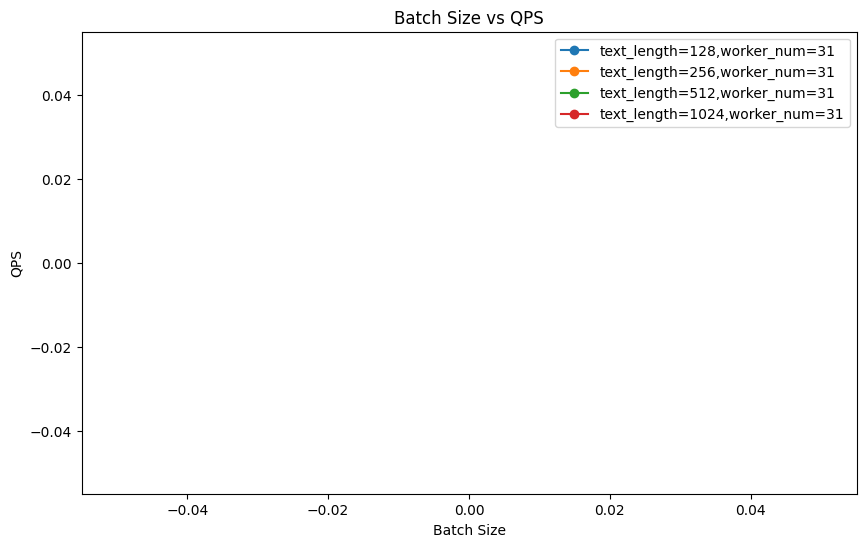

In [13]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# (batch_size, worker_num)
for t, w in [(128, 31), (256, 31), (512, 31), (1024, 31)]:
    filtered_df = df[(df["text_length"] == t) & (df["worker_num"] == w)]
    plt.plot(filtered_df['batch_size'], filtered_df[qps], marker='o', linestyle='-', label=f'text_length={t},worker_num={w}')

plt.title("Batch Size vs QPS")
plt.xlabel('Batch Size')
plt.ylabel(qps)
# Show the legend
plt.legend()
# Show the plot
plt.show()

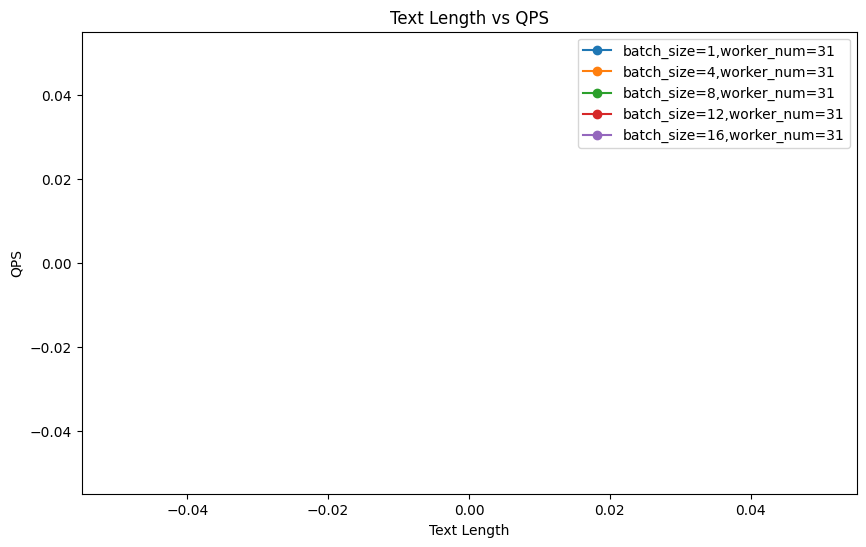

In [14]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# (batch_size, worker_num)
for t, w in [(1, 31), (4, 31), (8, 31), (12, 31), (16, 31)]:
    filtered_df = df[(df["batch_size"] == t) & (df["worker_num"] == w)]
    plt.plot(filtered_df['text_length'], filtered_df[qps], marker='o', linestyle='-', label=f'batch_size={t},worker_num={w}')

plt.title("Text Length vs QPS")
plt.xlabel('Text Length')
plt.ylabel(qps)
# Show the legend
plt.legend()
# Show the plot
plt.show()

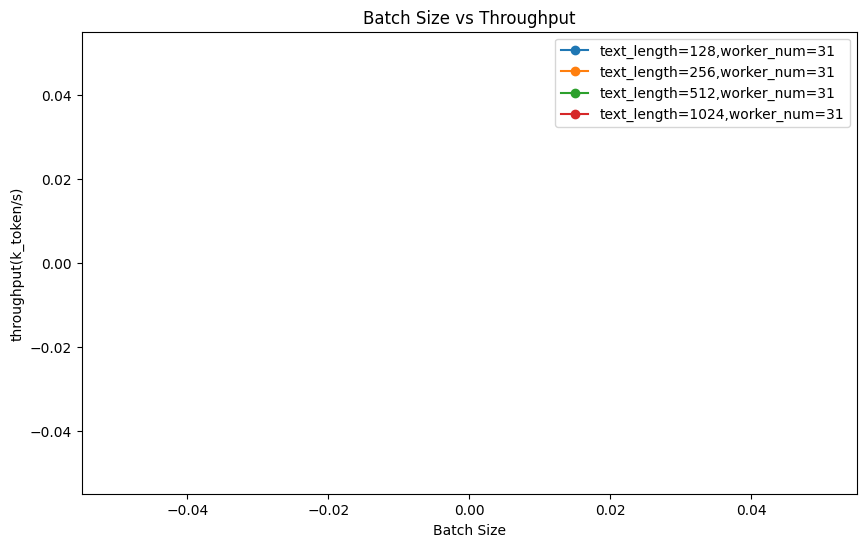

In [15]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# (batch_size, worker_num)
for t, w in [(128, 31), (256, 31), (512, 31), (1024, 31)]:
    filtered_df = df[(df["text_length"] == t) & (df["worker_num"] == w)]
    plt.plot(filtered_df['batch_size'], filtered_df[throughput], marker='o', linestyle='-', label=f'text_length={t},worker_num={w}')

plt.title("Batch Size vs Throughput")
plt.xlabel('Batch Size')
plt.ylabel(throughput)
# Show the legend
plt.legend()
# Show the plot
plt.show()

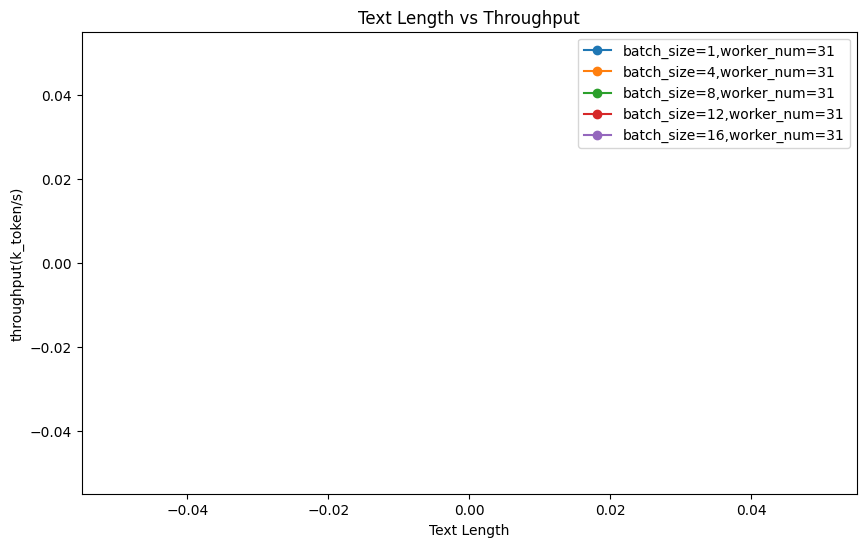

In [16]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# (batch_size, worker_num)
for t, w in [(1, 31), (4, 31), (8, 31), (12, 31), (16, 31)]:
    filtered_df = df[(df["batch_size"] == t) & (df["worker_num"] == w)]
    plt.plot(filtered_df['text_length'], filtered_df[throughput], marker='o', linestyle='-', label=f'batch_size={t},worker_num={w}')

plt.title("Text Length vs Throughput")
plt.xlabel('Text Length')
plt.ylabel(throughput)
# Show the legend
plt.legend()
# Show the plot
plt.show()
